In [ ]:
import pandas as pd
import time 

In [ ]:
import hashlib

def calc_hash(self):
    sha = hashlib.sha256()

    hash_str = data.encode('utf-8')

    sha.update(hash_str)

    return sha.hexdigest()

In [ ]:
sha = hashlib.sha256()

In [ ]:
hash_str = 'I start Blockchain task'.encode('utf-8')
sha.update(hash_str)

In [ ]:
sha.hexdigest()

'7de290216c80f4faf00523cd130e613e2622d89c26bd96d85d47c5ef8b62b98d'

In [6]:
hash_str = 'I practicing with sha funtions'.encode('utf-8')
sha.update(hash_str)

In [7]:
sha.hexdigest()

'0b1763e2d3e7a81cccad24519a09fbc722dfdd80a85724f770987615214ca3d9'

## Explanation:
Im implemented Blockchain using linked list structure for Blockchain itself, and to store data of transactions i implemented as a distionary/hash map. 

## Time and Space commplexity:

#-------------------------
<br> *Time Complexity*:
<br> #-------------------------

<br> Adding a New Block (Appending to the Linked List):

Time complexity: O(1)
Appending a new block to the end of a linked list is a constant time operation.

<br> Traversing the Blockchain:

Time complexity: O(n)
If one needs to traverse the entire blockchain (all blocks), the time complexity is linear, where n is the number of blocks in the chain.

<br> Validating the Blockchain:

Time complexity: O(n)
Validating the entire blockchain involves traversing all blocks and verifying the integrity of each block.

<br> Searching for a Specific Block:

Time complexity: O(n) in a worst case

Searching for a block in the linked list involves traversing the list until the target block is found.

#----------------------------
<br> *Space Complexity:*
<br> #----------------------------

<br> Storing the Blockchain (Linked List Nodes):

<br>Space complexity: O(n)
The space required to store the blockchain is proportional to the number of blocks. Each block corresponds to a node in the linked list.

<br>Additional Metadata (Block Information, Pointers, etc.):

The space complexity may include additional metadata associated with each block - timestamps, transaction data, and pointers to the next block.
The overall space complexity may depend on the size of this metadata. im my test examples its rather could be not taken in count.



#------PS ------------
Notes:
Block Validation Overhead:

While validating the blockchain has a time complexity of O(n), the actual validation process may involve cryptographic operations, which can add computational overhead.
Dynamic Block Addition:

If the blockchain allows dynamic addition and removal of blocks (e.g., through a consensus mechanism), the time complexity of certain operations may vary.


<br> Transaction Processing:

If the blocks contain a large number of transactions, the time complexity for operations involving transactions may be influenced by the number of transactions within each block.


<br> Optimizations:

Various optimizations can be applied to improve the efficiency of certain operations, such as using hash pointers for quick verification.
Keep in mind that the actual complexities can vary based on implementation details and specific design choices within the blockchain system.


## Calculate hash function for a dictionary of data

In [8]:
import hashlib

def hash_dictionary(dict_data, hash_algorithm='sha256'):
    hashed_dict = {}

    for key, value in dict_data.items():
        # Convert the value to a bytes-like object (assumes value is a string)
        value_bytes = str(value).encode('utf-8')

        # Choose the hash algorithm (default is SHA-256)
        hash_func = hashlib.new(hash_algorithm)

        # Update the hash with the value bytes
        hash_func.update(value_bytes)

        # Get the hexadecimal representation of the hash
        hashed_value = hash_func.hexdigest()

        # Store the hashed value in the new dictionary
        hashed_dict[key] = hashed_value
        

    return list(hashed_dict.values())[0]

# Example usage:
dict_data = {'key1': 'abc', 'key2': 'def', 'key3': 'abcde'}
hashed_result = hash_dictionary(dict_data)

#print(f"Original Dictionary: {dict_data}")
print(f"Hashed Dictionary: {hashed_result}")

Hashed Dictionary: ba7816bf8f01cfea414140de5dae2223b00361a396177a9cb410ff61f20015ad


In [9]:
sha_data = {'data' : ['EUR', 100, 'sent','Natalia']}
hash_dictionary(dict_data = sha_data)

'afb14dad1ed9c0f7922c1844bc19b0993c27b0d502513afe360bcd15f8b68df1'

## Blockchain implementation

In [10]:
class Block:
        
    def __init__(self,  data, previous_hash=None):
        self.timestamp = time.time()
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calc_hash()
        self.next = None
        
    def calc_hash(self):
        sha = hashlib.sha256()
        sha.update(str(self.timestamp).encode('utf-8') + str(self.data).encode('utf-8') +
                  
                   str(self.previous_hash).encode('utf-8')) 
        
        return sha.hexdigest()
    
    def __str__(self):
        return f"Data: {self.data}, Previous Hash: {self.previous_hash}, Hash: {self.hash}"

    
    


class Blockchain():
    def __init__(self):
        self.head = None
        self.tail = None
        self.previous_hash = None  # Initialize previous_hash
        

    def append(self, data):
        """ Append a value as a head, which will be a tail as well """    
       
        if self.head is None:
            self.head = Block(data, self.previous_hash)
            self.tail = self.head
            previous_hash = self.head.hash

        else:
            """ Append a value to the tail """   
            self.tail.next = Block(data, self.tail.hash)
            self.tail = self.tail.next
        
        return self.head
    
    

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import math

def visualize_linked_list_horizontal(head):
        G = nx.DiGraph()

        current_node = head
        pos = {}
        x_position = 0

        while current_node:
            G.add_node(current_node.data)
            pos[current_node.data] = (x_position, 0)
            x_position += 100  # Move right for the next node

            if current_node.next:
                G.add_edge(current_node.data, current_node.next.data)

            current_node = current_node.next

        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrows=True)
        plt.show()
        

def visualize_linked_list_vertical(head):
    G = nx.DiGraph()

    current_node = head
    num_nodes = 0

    while current_node:
        G.add_node(current_node.data)
        num_nodes += 1
        current_node = current_node.next

    positions = {}

    for i, node in enumerate(G.nodes):
        angle = (i / num_nodes) * 2 * math.pi
        x = 0  # Center the nodes along the y-axis
        y = -math.cos(angle) - 0.5 * i  # Adjust the y-coordinate to prevent overlap
        positions[node] = (x, y)

    # Draw nodes
    nx.draw(G, positions, with_labels=False, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrows=True)

    # Draw node labels to the right
    for node, (x, y) in positions.items():
        plt.text(x + 0.1, y, node, fontsize=8, ha='left', va='center')

    plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
    plt.axis('off')  # Turn off the axis
    plt.show()


## Blockchain Test Case 1:

In [12]:
Transactions = Blockchain()
#data: [currency_name,amount,'sent'/'received', reciever/sender name]
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)

#adding transactions to Blockchain "Transactions"
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)


In [13]:
current_block = Transactions.head
i = 0
while current_block is not None:
    print('Block ', i)
    i += 1
    print('Timestamp:', current_block.timestamp)
    print('Block information:', str(current_block))
    print('Previous hash:',current_block.previous_hash)
    print('Current hash:',current_block.hash)
    print('---------------------------')

    current_block = current_block.next
  

['EUR', 100, 'sent', 'Natalia']
['AUS', 200, 'sent', 'Vladimir']
['UKR_HRV', 2999, 'received', 'Kate']
['RUS', 1000, 'received', 'Denis']


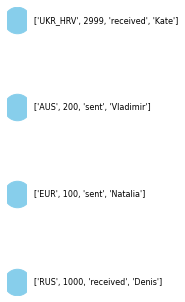

In [14]:
visualize_linked_list_vertical(Transactions.head)

In [15]:
#visualize_linked_list_horizontal(Transactions.head)

## Blockchain Test Case 2:

In [16]:
## and two of them must include edge cases, such as null, empty or very large values


In [17]:
Transactions = Blockchain()
#data: [currency_name,amount,'sent'/'received', reciever/sender name]
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)
Kate = Block( data = ['EUR', 100, 'sent','Natalia'], previous_hash = None)
Denis = Block( data  = ['AUS', 200, 'sent','Vladimir'], previous_hash = Kate.hash)
Natalia = Block( data  = ['UKR_HRV', 2999, 'received','Kate'], previous_hash = Denis.hash)
Vladimir = Block( data = ['RUS', 1000, 'received','Denis'], previous_hash = Natalia.hash)


In [18]:
#adding transactions to Blockchain "Transactions"
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)
Transactions.append(Kate)
Transactions.append(Denis )
Transactions.append(Natalia)
Transactions.append(Vladimir)


In [19]:
current_block = Transactions.head
i = 0
while current_block is not None:
    print('Block ', i)
    i += 1
    print('Timestamp:', current_block.timestamp)
    print('Block information:', str(current_block))
    print('Previous hash:',current_block.previous_hash)
    print('Current hash:',current_block.hash)
    print('---------------------------')

    current_block = current_block.next
   

['EUR', 100, 'sent', 'Natalia']
['AUS', 200, 'sent', 'Vladimir']
['UKR_HRV', 2999, 'received', 'Kate']
['RUS', 1000, 'received', 'Denis']
['EUR', 100, 'sent', 'Natalia']
['AUS', 200, 'sent', 'Vladimir']
['UKR_HRV', 2999, 'received', 'Kate']
['RUS', 1000, 'received', 'Denis']
['EUR', 100, 'sent', 'Natalia']
['AUS', 200, 'sent', 'Vladimir']
['UKR_HRV', 2999, 'received', 'Kate']
['RUS', 1000, 'received', 'Denis']
['EUR', 100, 'sent', 'Natalia']
['AUS', 200, 'sent', 'Vladimir']
['UKR_HRV', 2999, 'received', 'Kate']
['RUS', 1000, 'received', 'Denis']
['EUR', 100, 'sent', 'Natalia']
['AUS', 200, 'sent', 'Vladimir']
['UKR_HRV', 2999, 'received', 'Kate']
['RUS', 1000, 'received', 'Denis']
['EUR', 100, 'sent', 'Natalia']
['AUS', 200, 'sent', 'Vladimir']
['UKR_HRV', 2999, 'received', 'Kate']
['RUS', 1000, 'received', 'Denis']
['EUR', 100, 'sent', 'Natalia']
['AUS', 200, 'sent', 'Vladimir']
['UKR_HRV', 2999, 'received', 'Kate']
['RUS', 1000, 'received', 'Denis']
['EUR', 100, 'sent', 'Natalia']
['

## Blockchain Test Case 3:

In [20]:
Transactions = Blockchain()
#data: [currency_name,amount,'sent'/'received', reciever/sender name]
current_block = Transactions.head
i = 0
while current_block is not None:
    print('Block ', i)
    i += 1
    print('Timestamp:', current_block.timestamp)
    print('Block information:', str(current_block))
    print('Previous hash:',current_block.previous_hash)
    print('Current hash:',current_block.hash)
    print('---------------------------')

    current_block = current_block.next
